In [68]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plot
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [69]:
pwd

'C:\\Users\\74510\\Anaconda projects'

In [70]:
data={'Country':['B','C','D','E','F','G','H'],
      'Output,Q':[80, 150, 135, 165, 95, 130, 110],
      'Labour,L': [60, 100, 100, 120, 70, 90, 80 ],
      'Capital,K': [50, 100, 80, 100, 60, 80, 70 ]}
data = pd.DataFrame(data , columns = ['Country','Output,Q','Labour,L','Capital,K'])  
data

,Country,"Output,Q","Labour,L","Capital,K"
0,B,80,60,50
1,C,150,100,100
2,D,135,100,80
3,E,165,120,100
4,F,95,70,60
5,G,130,90,80
6,H,110,80,70


In [72]:
data.agg(['mean','var','std','median'])

,"Output,Q","Labour,L","Capital,K"
mean,123.571429,88.571429,77.142857
var,914.285714,414.285714,357.142857
std,30.237158,20.354010,18.898224
median,130.000000,90.000000,80.000000


In [73]:
df.describe()

,"Output,Q","Labour,L","Capital,K"
count,7.000000,7.000000,7.000000
mean,123.571429,88.571429,77.142857
std,30.237158,20.354010,18.898224
min,80.000000,60.000000,50.000000
25%,102.500000,75.000000,65.000000
50%,130.000000,90.000000,80.000000
75%,142.500000,100.000000,90.000000
max,165.000000,120.000000,100.000000


In [74]:
df.mean()

Output,Q     123.571429
Labour,L      88.571429
Capital,K     77.142857
dtype: float64

In [75]:
df.var()

Output,Q     914.285714
Labour,L     414.285714
Capital,K    357.142857
dtype: float64

In [77]:
df.std()

Output,Q     30.237158
Labour,L     20.354010
Capital,K    18.898224
dtype: float64

In [78]:
df.median()

Output,Q     130.0
Labour,L      90.0
Capital,K     80.0
dtype: float64

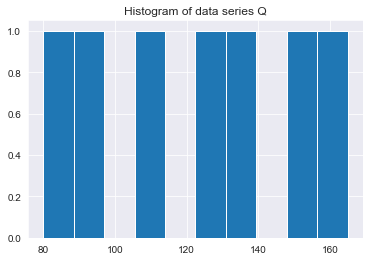

In [80]:
Q=data['Output,Q']
plot.hist(Q)
plot.title("Histogram of data series Q")
plot.show()

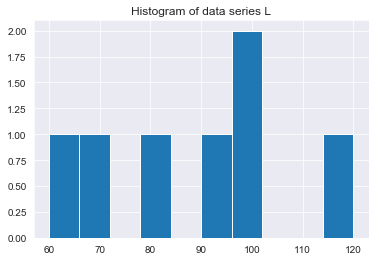

In [82]:
L=data['Labour,L']
plot.hist(L)
plot.title("Histogram of data series L")
plot.show()

In [59]:
y=np.log(data['Output,Q'])
y

0    4.382027
1    5.010635
2    4.905275
3    5.105945
4    4.553877
5    4.867534
6    4.700480
Name: Output,Q, dtype: float64

In [60]:
x=np.log(data[['Labour,L','Capital,K']])
x

,"Labour,L","Capital,K"
0,4.094345,3.912023
1,4.605170,4.605170
2,4.605170,4.382027
3,4.787492,4.605170
4,4.248495,4.094345
5,4.499810,4.382027
6,4.382027,4.248495


In [61]:
x=sm.add_constant(x)
model=smf.OLS(y,x).fit()
pred=model.predict(x)
model.summary()

C:\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Output,Q   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        22:26:25   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1462      0.114      1.282      0.269      -0.170       0.463
Labour,L       0.5484      0.090      6.127      0.004       0.300       0.797
Capital,K      0.5087      0.083      6.150      0.004       0.279       0.738
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.801
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.261
Skew:                           1.352   Prob(JB):                        0.323
Kurtosis:                       3.665   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

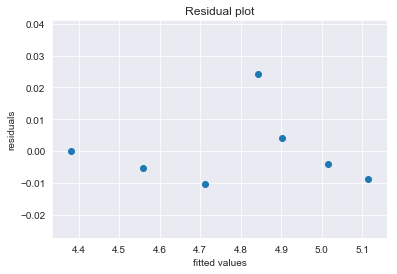

In [65]:
plot.scatter(model.fittedvalues,model.resid)
plot.title(("Residual plot"))
plot.xlabel('fitted values')
plot.ylabel('residuals')
plot.show()

In [66]:
print ('adjusted R^2 is:', model.rsquared_adj)

adjusted R^2 is: 0.9968763418198051
